In [ ]:
import tensorflow as tf
from tensorflow.keras import datasets, layers, models
import matplotlib.pyplot as plt
import numpy as np


**Load the dataset**

In [ ]:
(X_train, y_train), (X_test,y_test) = datasets.cifar10.load_data()
X_train.shape

(50000, 32, 32, 3)

In [ ]:
X_test.shape

(10000, 32, 32, 3)

In [ ]:
y_train.shape

(50000, 1)

In [ ]:
y_train[:5]

array([[6],
       [9],
       [9],
       [4],
       [1]], dtype=uint8)

y_train is a 2D array, for our classification having 1D array is good enough. so we will convert this to now 1D array

In [ ]:
y_train = y_train.reshape(-1,)
y_train[:5]

array([6, 9, 9, 4, 1], dtype=uint8)

In [ ]:
y_test = y_test.reshape(-1,)

In [ ]:
classes = ["airplane","automobile","bird","cat","deer","dog","frog","horse","ship","truck"]


Let's plot some images to see what they are


In [ ]:
def plot_sample(X, y, index):
    plt.figure(figsize = (15,2))
    plt.imshow(X[index])
    plt.xlabel(classes[y[index]])

In [ ]:
plot_sample(X_train, y_train, 0)

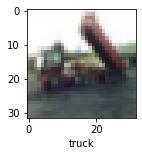

In [ ]:
plot_sample(X_train, y_train, 2)


Normalize the images to a number from 0 to 1. Image has 3 channels (R,G,B) and each value in the channel can range from 0 to 255. Hence to normalize in 0-->1 range, we need to divide it by 255




**Normalizing the training data**

In [ ]:
X_train = X_train / 255.0
X_test = X_test / 255.0

**Build simple artificial neural network for image classification**

In [ ]:
ann = models.Sequential([
        layers.Flatten(input_shape=(32,32,3)),
        layers.Dense(3000, activation='relu'),
        layers.Dense(1000, activation='relu'),
        layers.Dense(10, activation='softmax')    
    ])

ann.compile(optimizer='SGD',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

ann.fit(X_train, y_train, epochs=5)


Epoch 1/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.8170 - accuracy: 0.3546
Epoch 2/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.6259 - accuracy: 0.4289
Epoch 3/5
1563/1563 [==============================] - 101s 65ms/step - loss: 1.5438 - accuracy: 0.4558
Epoch 4/5
1563/1563 [==============================] - 101s 64ms/step - loss: 1.4820 - accuracy: 0.4776
Epoch 5/5
1563/1563 [==============================] - 100s 64ms/step - loss: 1.4313 - accuracy: 0.4958


**You can see that at the end of 5 epochs, accuracy is at around 49%**



In [ ]:
from sklearn.metrics import confusion_matrix , classification_report
import numpy as np
y_pred = ann.predict(X_test)
y_pred_classes = [np.argmax(element) for element in y_pred]

print("Classification Report: \n", classification_report(y_test, y_pred_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.37      0.60      0.46      1000
           1       0.66      0.45      0.53      1000
           2       0.35      0.32      0.34      1000
           3       0.43      0.20      0.27      1000
           4       0.51      0.29      0.37      1000
           5       0.43      0.34      0.38      1000
           6       0.47      0.62      0.53      1000
           7       0.61      0.47      0.53      1000
           8       0.38      0.81      0.52      1000
           9       0.57      0.45      0.50      1000

    accuracy                           0.45     10000
   macro avg       0.48      0.45      0.44     10000
weighted avg       0.48      0.45      0.44     10000



**Now let us build a convolutional neural network to train our images**

In [ ]:
cnn = models.Sequential([
    layers.Conv2D(filters=32, kernel_size=(3, 3), activation='relu', input_shape=(32, 32, 3)),
    layers.MaxPooling2D((2, 2)),
    
    layers.Conv2D(filters=64, kernel_size=(3, 3), activation='relu'),
    layers.MaxPooling2D((2, 2)),
    
    layers.Flatten(),
    layers.Dense(64, activation='relu'),
    layers.Dense(10, activation='softmax')
])

In [ ]:
cnn.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

In [ ]:
cnn.fit(X_train, y_train, epochs=10)


Epoch 1/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.4636 - accuracy: 0.4773
Epoch 2/10
1563/1563 [==============================] - 63s 40ms/step - loss: 1.1161 - accuracy: 0.6091
Epoch 3/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.9938 - accuracy: 0.6552
Epoch 4/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.9235 - accuracy: 0.6799
Epoch 5/10
1563/1563 [==============================] - 62s 40ms/step - loss: 0.8554 - accuracy: 0.7013
Epoch 6/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.8027 - accuracy: 0.7202
Epoch 7/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7537 - accuracy: 0.7394
Epoch 8/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.7103 - accuracy: 0.7556
Epoch 9/10
1563/1563 [==============================] - 63s 40ms/step - loss: 0.6695 - accuracy: 0.7672
Epoch 10/10
1563/1563 [==============================] - 63s 40m

**With CNN, at the end 5 epochs, accuracy was at around 70% which is a significant improvement over ANN. CNN's are best for image classification and gives superb accuracy. Also computation is much less compared to simple ANN as maxpooling reduces the image dimensions while still preserving the features**

In [ ]:
cnn.evaluate(X_test,y_test)


313/313 [==============================] - 4s 13ms/step - loss: 0.9219 - accuracy: 0.6995


[0.9218767285346985, 0.6995000243186951]

In [ ]:
y_pred = cnn.predict(X_test)
y_pred[:5]

array([[4.71606269e-04, 8.84895271e-05, 3.73986753e-04, 9.32330072e-01,
        4.86614939e-04, 3.87071148e-02, 1.20335375e-03, 3.55564989e-04,
        2.59109754e-02, 7.22247059e-05],
       [3.90380068e-04, 5.42516494e-03, 1.98715748e-06, 1.10286722e-08,
        2.24631890e-07, 6.37702779e-09, 1.41241925e-08, 1.77911419e-09,
        9.94110167e-01, 7.20393000e-05],
       [4.65264708e-01, 1.96636125e-01, 3.71588417e-03, 1.61491858e-03,
        1.02634670e-03, 4.97509667e-04, 1.71872598e-04, 1.06364326e-03,
        2.61393309e-01, 6.86157793e-02],
       [2.78197706e-01, 1.43884951e-02, 8.26792419e-03, 1.10549037e-03,
        4.60821809e-03, 1.98075959e-05, 4.23205842e-04, 2.67515406e-05,
        6.92568600e-01, 3.93703813e-04],
       [1.99785791e-06, 3.31966612e-06, 2.05242392e-02, 6.71741888e-02,
        2.30005026e-01, 1.97754288e-03, 6.80305123e-01, 2.58459158e-06,
        5.85914813e-06, 1.71035595e-07]], dtype=float32)

In [ ]:
y_classes = [np.argmax(element) for element in y_pred]
y_classes[:5]

[3, 8, 0, 8, 6]

In [ ]:
y_test[:5]


array([3, 8, 8, 0, 6], dtype=uint8)

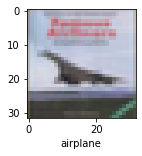

In [ ]:
plot_sample(X_test, y_test,3)


In [ ]:
classes[y_classes[3]]

'ship'

In [ ]:
print("Classification Report: \n", classification_report(y_test, y_classes))

Classification Report: 
               precision    recall  f1-score   support

           0       0.77      0.71      0.74      1000
           1       0.87      0.77      0.82      1000
           2       0.67      0.50      0.58      1000
           3       0.53      0.51      0.52      1000
           4       0.68      0.59      0.63      1000
           5       0.58      0.67      0.62      1000
           6       0.72      0.81      0.76      1000
           7       0.64      0.83      0.72      1000
           8       0.82      0.78      0.80      1000
           9       0.75      0.82      0.78      1000

    accuracy                           0.70     10000
   macro avg       0.70      0.70      0.70     10000
weighted avg       0.70      0.70      0.70     10000

